In [ ]:
# -*- coding: utf-8 -*-
"""
Created on 2023/04/11
Revised on 2024/06/24

@author: mjofre - Marc Jofre
e-mail: marc.jofre@upc.edu
Technical University of Catalonia - Universitat Politècnica de Catalunya (UPC)
Network Engineering Department
"""
###########################################################################
# Seminar on Quantum Technologies for Communications and Computing: Networking and Systems
# Class
# Session 6 - Quantum hardware and systems

import os, sys, time
import numpy as np
import math, scipy
import matplotlib.pyplot as plt
from google.colab import files # This line can be commented when running in local computer
import matplotlib.style
import matplotlib as mpl
#print(plt.style.available)
mpl.style.use('default')


# Its about counts and statistics

Examples of Poissonian distribution

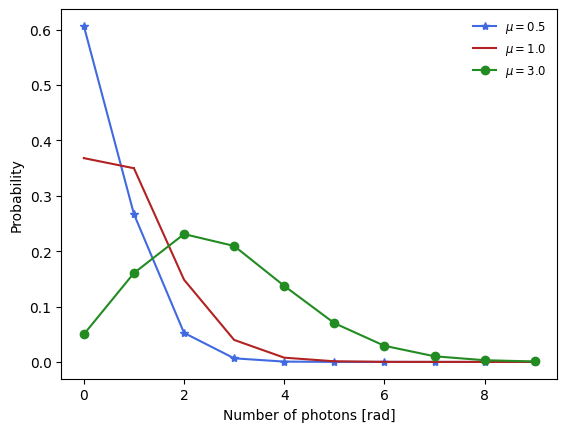

In [ ]:
# Example Plot a Poisson Distribution
from scipy.stats import poisson
import matplotlib.pyplot as plt

#generate Poisson distribution with sample size - effects of variance
"""
SampleSize=1000
SampleBins=10
y1,x1 = np.histogram(poisson.rvs(mu=0.5, size=SampleSize),bins=SampleBins)
y2,x2 = np.histogram(poisson.rvs(mu=1.0, size=SampleSize),bins=SampleBins)
y3,x3 = np.histogram(poisson.rvs(mu=4.0, size=SampleSize),bins=SampleBins)
y1=y1/np.sum(y1)
y2=y2/np.sum(y2)
y3=y3/np.sum(y3)
"""
# generate Poisson distribution with theoretical expression
nPhotons=np.linspace(0,10,10)
mu1=0.5
mu2=1.0
mu3=3
y1=((mu1**nPhotons)/scipy.special.factorial(nPhotons))*np.exp(-mu1)
y2=((mu2**nPhotons)/scipy.special.factorial(nPhotons))*np.exp(-mu2)
y3=((mu3**nPhotons)/scipy.special.factorial(nPhotons))*np.exp(-mu3)

#create plot of Poisson distribution
plt.figure()
line1,=plt.plot(y1,'royalblue',linestyle='solid',marker='*')
line2,=plt.plot(y2,'firebrick',linestyle='solid',marker=',')
line3,=plt.plot(y3,'forestgreen',linestyle='solid',marker='o')
plt.legend((line1, line2, line3), (r'$\mu=0.5$',r'$\mu=1.0$',r'$\mu=3.0$'),loc="best",shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.xlabel('Number of photons [rad]',color='k')
plt.ylabel('Probability',color='k')
plt.show()

In [ ]:
# Example 1: Probability Equal to Some Value
from scipy.stats import poisson
#calculate probability
print(poisson.pmf(k=5, mu=3))


0.10081881344492458


In [ ]:
# Example 3: Probability Greater than Some Value
from scipy.stats import poisson

#calculate probability
print(1-poisson.cdf(k=20, mu=15))


0.08297091003146029


# Wrap-up of Probability errors and Fidelity

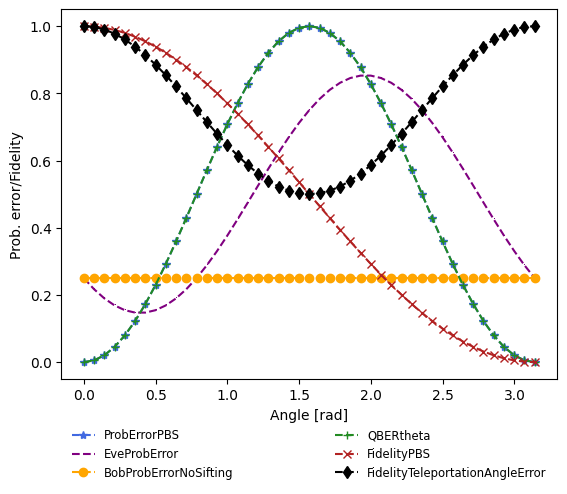

In [ ]:
##############################################################################
# Relation of Probability errors, QBER, Fidelities with the the rotation of the measurement basis \theta
NcalcAngle=45
MaxAngle=np.pi
AnglesScan=np.linspace(0,MaxAngle,NcalcAngle)

ProbErrorPBS=1.0-np.cos(AnglesScan)**2
EveProbError=0.25*((1.0-np.cos(2.0*AnglesScan))+(1.0-np.sin(2.0*AnglesScan))) # Error probability when Eve is randomly changing basis (it is minimized to 14.64% when theta=np.pi/8 - Breidbart basis)
BobProbErrorNoSifting=0.25*((1.0-np.cos(2.0*AnglesScan)**2)+(1.0-np.sin(2.0*AnglesScan)**2)) # Error probability when Bob is randomly changes basis (before key sifting)
QBERtheta=1.0-np.cos(AnglesScan)**2 # Error probability equivalent to Bob when doing sifting
FidelityPBS=1.0-np.sin(AnglesScan/2.0)**2# Angle is half, because at np.pi/2.0 its like at half place between the two states
FidelityTeleportationAngleError=1.0-ProbErrorPBS/2.0
# Fidelity towards a Bell state if usually as F=0.5*(1+cos(\theta)); depending on the Bell state of interest \theta has to be adjusted or even the cos can be replaced by a sin
# Fidelity cascaded devices F=Fi**N
# Fidelity in terms of coincidences F=RatioRc/(1.0+RatioRc), where RatioRc is the ratio of coincidences between RcParallel/RcOrthogonal (Rc coincidence rate)

plt.figure()
line1,=plt.plot(AnglesScan,ProbErrorPBS,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(AnglesScan,EveProbError,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(AnglesScan,BobProbErrorNoSifting,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(AnglesScan,QBERtheta,'forestgreen',linestyle='dashed',marker='+')
line5,=plt.plot(AnglesScan,FidelityPBS,'firebrick',linestyle='dashed',marker='x')
line6,=plt.plot(AnglesScan,FidelityTeleportationAngleError,'black',linestyle='dashed',marker='d')
plt.legend((line1, line2, line3, line4, line5, line6), ('ProbErrorPBS','EveProbError','BobProbErrorNoSifting','QBERtheta','FidelityPBS','FidelityTeleportationAngleError'),bbox_to_anchor=(0, -0.3, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.xlabel('Angle [rad]',color='k')
plt.ylabel('Prob. error/Fidelity',color='k')
plt.show()

####################################################
# Relevant transmittivity/loss related equations:
# Rr=eta Rs # where eta is the transmissivity as eta \leq 1 and proportional to np.exp(-att Distance), where att is the attenuation att\geq 0.
# dBatt=dBLoss/Km*L(Km)
# dBatt=-10 log10(eta)
# ProbabilityPhotonLoss=1-eta=1-np.exp(-Distance/L0), where dBLoss/Km * L0=-10 log10(1/e)

####################################################
# Relevant trigonometric relations
# cos(theta)**2+sin(theta)**2=1
# sin(theta)**2=0.5*(1-cos(2theta))
# cos(theta)**2=0.5*(1+cos(2theta))